# Trabalho 1 - Aprendizado de Máquina - Davi Santos Ferrarez

Hábitos dos alunos vs Desempenho acadêmico 
https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import pandas as pd

dataset = r"C:\Users\davif\Downloads\student_habits_performance.csv"

habitos_performance = pd.read_csv(dataset)

In [5]:
habitos_performance.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [6]:
habitos_performance.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [7]:
habitos_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

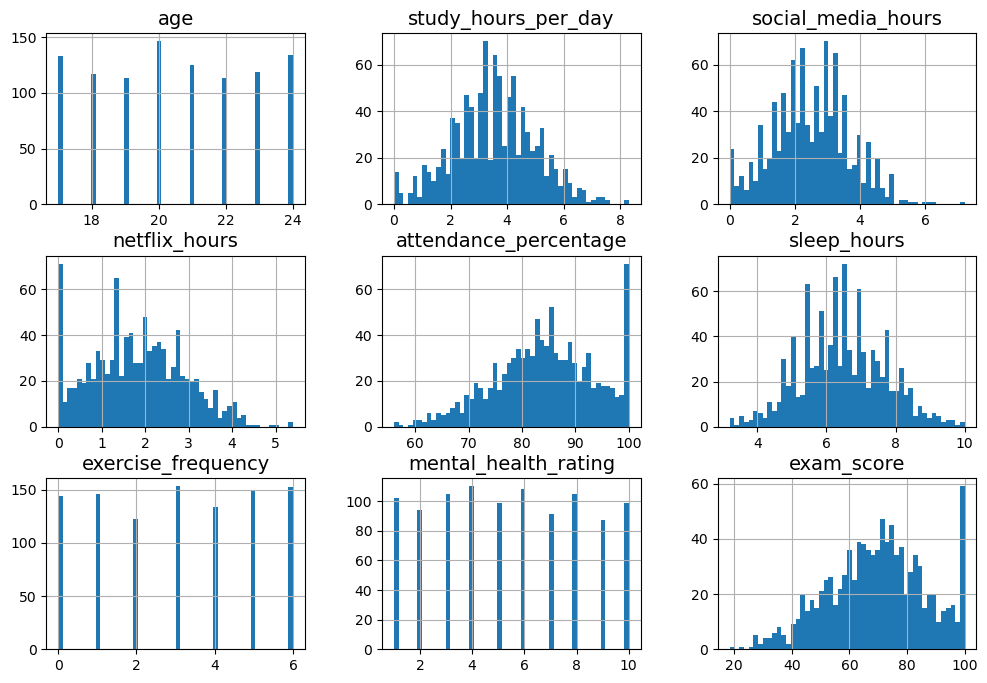

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

habitos_performance.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
corr_matrix = habitos_performance.corr(numeric_only=True)

corr_matrix["exam_score"].sort_values(ascending=False)

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64

<Axes: >

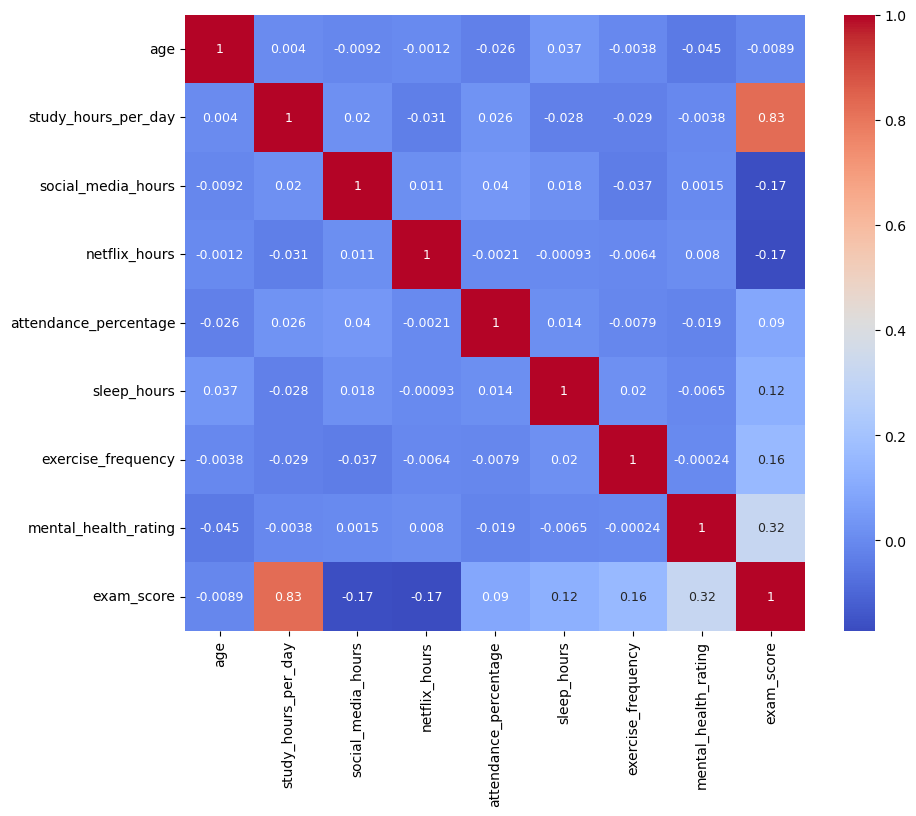

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, annot_kws={"size":9}, cmap = 'coolwarm')

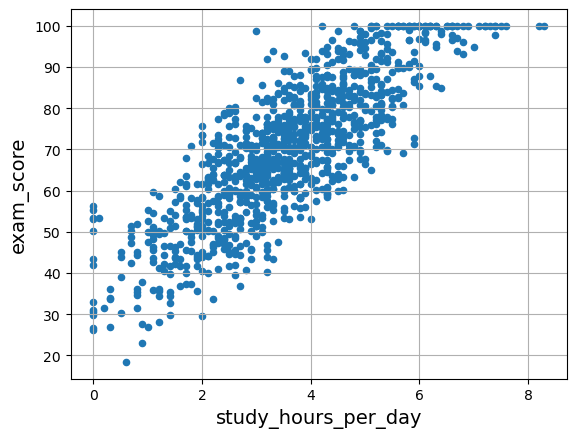

In [11]:
habitos_performance.plot(kind="scatter", x="study_hours_per_day", y="exam_score", grid=True)
plt.show()

In [12]:
habitos_performance["part_time_job"] = habitos_performance["part_time_job"].map({"Yes":1, "No":0})

In [13]:
X = habitos_performance[["age", "social_media_hours", "study_hours_per_day", "netflix_hours",
                         "attendance_percentage", "sleep_hours", "mental_health_rating", "part_time_job"]]
y = habitos_performance["exam_score"]

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lista_rmse = []
lista_mae = []
lista_r2 = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    lista_rmse.append(rmse)
    lista_mae.append(mae)
    lista_r2.append(r2)

media_rmse = np.mean(lista_rmse)
media_mae = np.mean(lista_mae)
media_r2 = np.mean(lista_r2)

desvio_padrao_rmse = np.std(lista_rmse)
desvio_padrao_mae = np.std(lista_mae)
desvio_padrao_r2 = np.std(lista_r2)

In [15]:
print(f"Media do RMSE: {media_rmse:.4f}")
print(f"Media do MAE: {media_mae:.4f}")
print(f"Media do R2: {media_r2:.4f}")

print(f"Desvio padrao do RMSE: {desvio_padrao_rmse:.4f}")
print(f"Desvio padrao do MAE: {desvio_padrao_mae:.4f}")
print(f"Desvio padrao do R2: {desvio_padrao_r2:.4f}")

Media do RMSE: 6.1213
Media do MAE: 4.8418
Media do R2: 0.8648
Desvio padrao do RMSE: 0.2327
Desvio padrao do MAE: 0.1368
Desvio padrao do R2: 0.0100
